In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsplots

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.filtertools import convolution_filter


import warnings

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits import mplot3d
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression

import seaborn as sns

register_matplotlib_converters()
sns.set_style("darkgrid")

In [2]:
!pip install rstl

In [3]:
import rstl

In [4]:
## Load Dataset
vh = pd.read_csv(r'C:\Berkeley ML_AI\Module 10\vehicles.csv')
vh.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Explority Data Analysis

In [5]:
vh.shape

(426880, 18)

In [6]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
vh.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [8]:
# Set "year" column as the time index
vh['year'] = pd.to_datetime(vh['year'], format='%Y')
vh.set_index('year', inplace=True)
vh.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
year,,,,,,,,,,,,,,,,,
NaT,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
NaT,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
NaT,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
NaT,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
NaT,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [9]:
## Looking at the date range to assess how wide the date range is
print('Date Range: {} to {}'.format(vh.index.min().date(), vh.index.max().date()))


Date Range: 1900-01-01 to 2022-01-01


In [10]:
## Looking at the unique values for each column to give me an idea of what I'm working with
vh.nunique()

id              426880
region             404
price            15655
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [11]:
# Check for null values in the dataset
null_counts = vh.isnull().sum()

# Print the null counts
print(null_counts)


id                   0
region               0
price                0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


Data Cleaning based on EDA

In [12]:
# Drop rows with missing values
vh_cleaned = vh.dropna()

In [13]:
vh_cleaned.isnull().sum()

id              0
region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [14]:
# Remove duplicates
vh_cleaned = vh_cleaned.drop_duplicates()

# Print the cleaned dataset
vh_cleaned.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
year,,,,,,,,,,,,,,,,,
2018-01-01,7305672709,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
2019-01-01,7305672266,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
2018-01-01,7305672252,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
2002-01-01,7316482063,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
1995-01-01,7316429417,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [23]:
# List the columns of the DataFrame
print(vh_cleaned.columns)


Index(['id', 'region', 'price', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'Current Year',
       'Age of Vehicle'],
      dtype='object')


In [24]:
## Removing any rows where the price is zero from the data frame. This is done to clean the data and remove outliers or errors.
vh_cleaned = vh_cleaned[vh_cleaned['price'] != 0]
vh_cleaned

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,Current Year,Age of Vehicle
year,,,,,,,,,,,,,,,,,,,
2002-01-01,7316482063,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,2022,20
1995-01-01,7316429417,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,2022,27
2008-01-01,7315946365,birmingham,9000,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,2022,14
2011-01-01,7315354216,birmingham,8950,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,2022,11
1972-01-01,7315349921,birmingham,4000,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al,2022,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,7303314912,wyoming,23495,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy,2022,7
2016-01-01,7303227528,wyoming,12995,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,2022,6
2014-01-01,7303114896,wyoming,32999,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,2022,8


In [25]:
## Adding Age of Vehicle column and calucating the age of each vechicle in the data set
vh_cleaned['Current Year'] = 2022
vh_cleaned['Age of Vehicle'] = vh_cleaned['Current Year'] - vh_cleaned.index.year
vh_cleaned.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,Current Year,Age of Vehicle
year,,,,,,,,,,,,,,,,,,,
2002-01-01,7316482063,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,2022,20
1995-01-01,7316429417,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,2022,27
2008-01-01,7315946365,birmingham,9000,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,2022,14
2011-01-01,7315354216,birmingham,8950,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,2022,11
1972-01-01,7315349921,birmingham,4000,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al,2022,50


In [22]:
age_range = (vh_cleaned['Age of Vehicle'].min(), vh_cleaned['Age of Vehicle'].max())
print("Range of Age of Vehicle:", age_range)


Range of Age of Vehicle: (0, 117)


In [27]:
## I only want to use valuable columns that have an overall effect of the price
vh_new = vh_cleaned.loc[:, ['price', 'condition', 'fuel', 'odometer', 'title_status', 'transmission', 
    'drive', 'size', 'type', 'Age of Vehicle']]
vh_new

,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,excellent,gas,155000.0,clean,automatic,fwd,compact,sedan,20
1995-01-01,2500,fair,gas,110661.0,clean,automatic,rwd,mid-size,sedan,27
2008-01-01,9000,excellent,gas,56700.0,clean,automatic,rwd,compact,convertible,14
2011-01-01,8950,excellent,gas,164000.0,clean,automatic,fwd,full-size,truck,11
1972-01-01,4000,fair,gas,88100.0,clean,automatic,rwd,full-size,coupe,50
...,...,...,...,...,...,...,...,...,...,...
2015-01-01,23495,like new,gas,146795.0,clean,automatic,4wd,full-size,truck,7
2016-01-01,12995,like new,gas,61127.0,clean,automatic,fwd,compact,sedan,6
2014-01-01,32999,excellent,diesel,154642.0,clean,automatic,4wd,full-size,pickup,8


In [28]:
## Looking at the condition of the vehicles in the data set
condition_features = vh_new['condition'].unique()
print(condition_features)


['excellent' 'fair' 'good' 'like new' 'new' 'salvage']


In [29]:
vh_new['condition'] = vh_new['condition'].replace('poor', 1)
vh_new['condition'] = vh_new['condition'].replace('fair', 2)
vh_new['condition'] = vh_new['condition'].replace('good', 3)
vh_new['condition'] = vh_new['condition'].replace('excellent', 4)
vh_new['condition'] = vh_new['condition'].replace('like new', 5)
vh_new['condition'] = vh_new['condition'].replace('new', 6)
vh_new['condition'] = vh_new['condition'].replace('salvage', 7)
vh_new.head()




,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,4,gas,155000.0,clean,automatic,fwd,compact,sedan,20
1995-01-01,2500,2,gas,110661.0,clean,automatic,rwd,mid-size,sedan,27
2008-01-01,9000,4,gas,56700.0,clean,automatic,rwd,compact,convertible,14
2011-01-01,8950,4,gas,164000.0,clean,automatic,fwd,full-size,truck,11
1972-01-01,4000,2,gas,88100.0,clean,automatic,rwd,full-size,coupe,50


In [30]:
## Looking at the fuel type of the vehicles in the data set
fuel_features = vh_new['fuel'].unique()
print(fuel_features)

['gas' 'hybrid' 'diesel' 'other' 'electric']


In [31]:
## Replacing the fuel type with a numerical value
vh_new['fuel'] = vh_new['fuel'].replace('gas', 1)
vh_new['fuel'] = vh_new['fuel'].replace('diesel', 2)
vh_new['fuel'] = vh_new['fuel'].replace('other', 3)
vh_new['fuel'] = vh_new['fuel'].replace('hybrid', 4)
vh_new['fuel'] = vh_new['fuel'].replace('electric', 5)
vh_new.head()


,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,4,1,155000.0,clean,automatic,fwd,compact,sedan,20
1995-01-01,2500,2,1,110661.0,clean,automatic,rwd,mid-size,sedan,27
2008-01-01,9000,4,1,56700.0,clean,automatic,rwd,compact,convertible,14
2011-01-01,8950,4,1,164000.0,clean,automatic,fwd,full-size,truck,11
1972-01-01,4000,2,1,88100.0,clean,automatic,rwd,full-size,coupe,50


In [33]:
## Looking at the title status of the vehicles in the data set
title_status_features = vh_new['title_status'].unique()
print(title_status_features)


['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']


In [34]:
## Replacing the title status with a numerical value
vh_new['title_status'] = vh_new['title_status'].replace('clean', 1)
vh_new['title_status'] = vh_new['title_status'].replace('lien', 2)
vh_new['title_status'] = vh_new['title_status'].replace('missing', 3)
vh_new['title_status'] = vh_new['title_status'].replace('salvage', 4)
vh_new['title_status'] = vh_new['title_status'].replace('rebuilt', 5)
vh_new['title_status'] = vh_new['title_status'].replace('parts only', 6)
vh_new.head()

,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,4,1,155000.0,1,automatic,fwd,compact,sedan,20
1995-01-01,2500,2,1,110661.0,1,automatic,rwd,mid-size,sedan,27
2008-01-01,9000,4,1,56700.0,1,automatic,rwd,compact,convertible,14
2011-01-01,8950,4,1,164000.0,1,automatic,fwd,full-size,truck,11
1972-01-01,4000,2,1,88100.0,1,automatic,rwd,full-size,coupe,50


In [36]:
## Replacing the transmission type with a numerical value
vh_new['transmission'] = vh_new['transmission'].replace('automatic', 1)
vh_new['transmission'] = vh_new['transmission'].replace('manual', 2)
vh_new['transmission'] = vh_new['transmission'].replace('other', 3)
vh_new.head()

,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,4,1,155000.0,1,1,fwd,compact,sedan,20
1995-01-01,2500,2,1,110661.0,1,1,rwd,mid-size,sedan,27
2008-01-01,9000,4,1,56700.0,1,1,rwd,compact,convertible,14
2011-01-01,8950,4,1,164000.0,1,1,fwd,full-size,truck,11
1972-01-01,4000,2,1,88100.0,1,1,rwd,full-size,coupe,50


In [37]:
## Looking at the transmission type of the vehicles in the data set
transmission_features = vh_new['transmission'].unique()
transmission_mapping = {1: 'automatic', 2: 'manual', 3: 'other'}

# Print the transmission descriptions
for value in transmission_features:
    print(f"{value}: {transmission_mapping[value]}")



1: automatic
2: manual
3: other


In [38]:
## Looking at the size of the vehicles in the data set
size_features = vh_new['size'].unique()
print(size_features)

['compact' 'mid-size' 'full-size' 'sub-compact']


In [39]:
## Replacing the size with a numerical value
vh_new['size'] = vh_new['size'].replace('full-size', 1)
vh_new['size'] = vh_new['size'].replace('mid-size', 2)
vh_new['size'] = vh_new['size'].replace('compact', 3)
vh_new['size'] = vh_new['size'].replace('sub-compact', 4)

## Looking the size of the vehicles in the data set
size_features = vh_new['size'].unique()
size_mapping = {1: 'full-size', 2: 'mid-size', 3: 'compact', 4: 'sub-compact'}

# Print the size descriptions
for value in size_features:
    print(f"{value}: {size_mapping[value]}")
    


3: compact
2: mid-size
1: full-size
4: sub-compact


In [40]:
## Looking at the type of the vehicles in the data set
type_features = vh_new['type'].unique()
print(type_features)

## Replacing the type with a numerical value
vh_new['type'] = vh_new['type'].replace('sedan', 1)
vh_new['type'] = vh_new['type'].replace('SUV', 2)
vh_new['type'] = vh_new['type'].replace('truck', 3)
vh_new['type'] = vh_new['type'].replace('pickup', 4)
vh_new['type'] = vh_new['type'].replace('other', 5)
vh_new['type'] = vh_new['type'].replace('coupe', 6)
vh_new['type'] = vh_new['type'].replace('hatchback', 7)
vh_new['type'] = vh_new['type'].replace('wagon', 8)
vh_new['type'] = vh_new['type'].replace('van', 9)
vh_new['type'] = vh_new['type'].replace('convertible', 10)
vh_new['type'] = vh_new['type'].replace('mini-van', 11)
vh_new['type'] = vh_new['type'].replace('bus', 12)
vh_new['type'] = vh_new['type'].replace('offroad', 13)

## Looking the type of the vehicles in the data set
type_features = vh_new['type'].unique()
type_mapping = {1: 'sedan', 2: 'SUV', 3: 'truck', 4: 'pickup', 5: 'other', 6: 'coupe', 7: 'hatchback', 8: 'wagon', 9: 'van', 10: 'convertible', 11: 'mini-van', 12: 'bus', 13: 'offroad'}

# Print the type descriptions
for value in type_features:
    print(f"{value}: {type_mapping[value]}")
    

['sedan' 'convertible' 'truck' 'coupe' 'SUV' 'hatchback' 'wagon' 'pickup'
 'other' 'van' 'mini-van' 'offroad' 'bus']
1: sedan
10: convertible
3: truck
6: coupe
2: SUV
7: hatchback
8: wagon
4: pickup
5: other
9: van
11: mini-van
13: offroad
12: bus


In [41]:
vh_new.head()

,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2002-01-01,4000,4,1,155000.0,1,1,fwd,3,1,20
1995-01-01,2500,2,1,110661.0,1,1,rwd,2,1,27
2008-01-01,9000,4,1,56700.0,1,1,rwd,3,10,14
2011-01-01,8950,4,1,164000.0,1,1,fwd,1,3,11
1972-01-01,4000,2,1,88100.0,1,1,rwd,1,6,50


In [42]:
## Looking at the drive type of the vehicles in the data set
drive_features = vh_new['drive'].unique()
print(drive_features)

['fwd' 'rwd' '4wd']


In [43]:
## Replacing the drive type with a numerical value
vh_new['drive'] = vh_new['drive'].replace('4wd', 1)
vh_new['drive'] = vh_new['drive'].replace('fwd', 2)
vh_new['drive'] = vh_new['drive'].replace('rwd', 3)

## Looking the drive type of the vehicles in the data set
drive_features = vh_new['drive'].unique()
drive_mapping = {1: '4wd', 2: 'fwd', 3: 'rwd'}

# Print the drive descriptions
for value in drive_features:
    print(f"{value}: {drive_mapping[value]}")
    


2: fwd
3: rwd
1: 4wd


In [44]:
## I want to sort the year from oldest to newest
vh_new.sort_index(inplace=True)
vh_new


,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
1905-01-01,3990,4,1,202570.0,1,1,3,1,9,117
1927-01-01,15900,4,1,5557.0,1,2,2,1,6,95
1927-01-01,27000,3,1,60.0,1,1,3,3,5,95
1928-01-01,54999,3,1,501.0,1,1,3,1,3,94
1928-01-01,15777,4,1,35000.0,1,1,3,1,5,94
...,...,...,...,...,...,...,...,...,...,...
2021-01-01,69000,5,1,5400.0,1,1,1,1,4,1
2021-01-01,19900,3,1,351.0,1,1,2,2,2,1
2021-01-01,49995,4,5,12500.0,1,1,1,3,2,1


In [46]:
salvage_info = vh_new[vh_new['condition'] == 'salvage']
salvage_info


,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,


In [47]:
# Filter the dataframe based on the date range for only 15 years of age
vh_new = vh_new.loc['2007':'2022']

# List date range of vh_new
print('Date Range: {} to {}'.format(vh_new.index.min(), vh_new.index.max()))



Date Range: 2007-01-01 00:00:00 to 2022-01-01 00:00:00


In [19]:
# Create a new dataframe with dummy variables
vh_new_dummies = pd.get_dummies(vh_new, drop_first=True)

# Convert the dummy variables to integers
vh_new_dummies = vh_new_dummies.astype(int)

# Print the resulting dataframe
print(vh_new_dummies)   


            price  odometer  Age of Vehicle  condition_fair  condition_good  \
year                                                                          
2007-01-01  11995    145702              15               0               0   
2007-01-01  28000     19700              15               0               0   
2007-01-01  11995    124390              15               0               1   
2007-01-01   1000    112744              15               0               1   
2007-01-01   3200    154700              15               0               1   
...           ...       ...             ...             ...             ...   
2021-01-01  69000      5400               1               0               0   
2021-01-01  19900       351               1               0               1   
2021-01-01  49995     12500               1               0               0   
2021-01-01  39988      1193               1               0               1   
2022-01-01  27725         1               0         

In [48]:
# make vh_new_dummies dataframe to vh_final dataframe
vh_final = vh_new
vh_final.head()

,price,condition,fuel,odometer,title_status,transmission,drive,size,type,Age of Vehicle
year,,,,,,,,,,
2007-01-01,11995,4,1,145702.0,1,1,1,1,3,15
2007-01-01,28000,5,1,19700.0,1,2,3,3,6,15
2007-01-01,11995,3,1,124390.0,1,1,1,1,2,15
2007-01-01,1000,3,1,112744.0,1,1,2,2,1,15
2007-01-01,3200,3,1,154700.0,1,1,2,2,1,15


In [49]:
print("Date Range of vh_final:")
print(vh_final.index.min().date(), "to", vh_final.index.max().date())


Date Range of vh_final:
2007-01-01 to 2022-01-01


C:\Users\ahove\AppData\Local\Temp\ipykernel_20388\4084122763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vh_final.sort_values(by='year', inplace=True)


Highest Correlation: 1.0


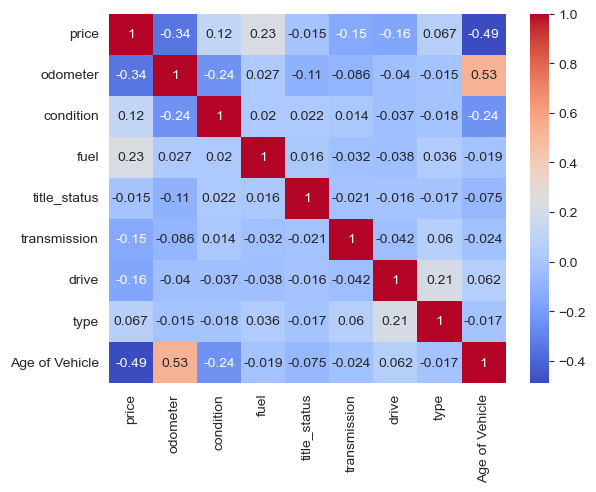

In [50]:
vh_final.sort_values(by='year', inplace=True)

# Select the columns of interest
columns_of_interest = ['price', 'odometer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'Age of Vehicle']
                       
subset_df = vh_final[columns_of_interest]

# Plot the correlation matrix
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Find the highest correlation value
highest_correlation = correlation_matrix.max().max()

# Print the highest correlation value
print("Highest Correlation:", highest_correlation)



In [72]:
type_mapping = {1: 'sedan', 2: 'SUV', 3: 'truck', 4: 'pickup', 5: 'other', 6: 'coupe', 7: 'hatchback', 8: 'wagon', 9: 'van', 10: 'convertible', 11: 'mini-van', 12: 'bus', 13: 'offroad'}

# Print the type descriptions
for value in type_mapping:
    print(f"{value}: {type_mapping[value]}")


1: sedan
2: SUV
3: truck
4: pickup
5: other
6: coupe
7: hatchback
8: wagon
9: van
10: convertible
11: mini-van
12: bus
13: offroad


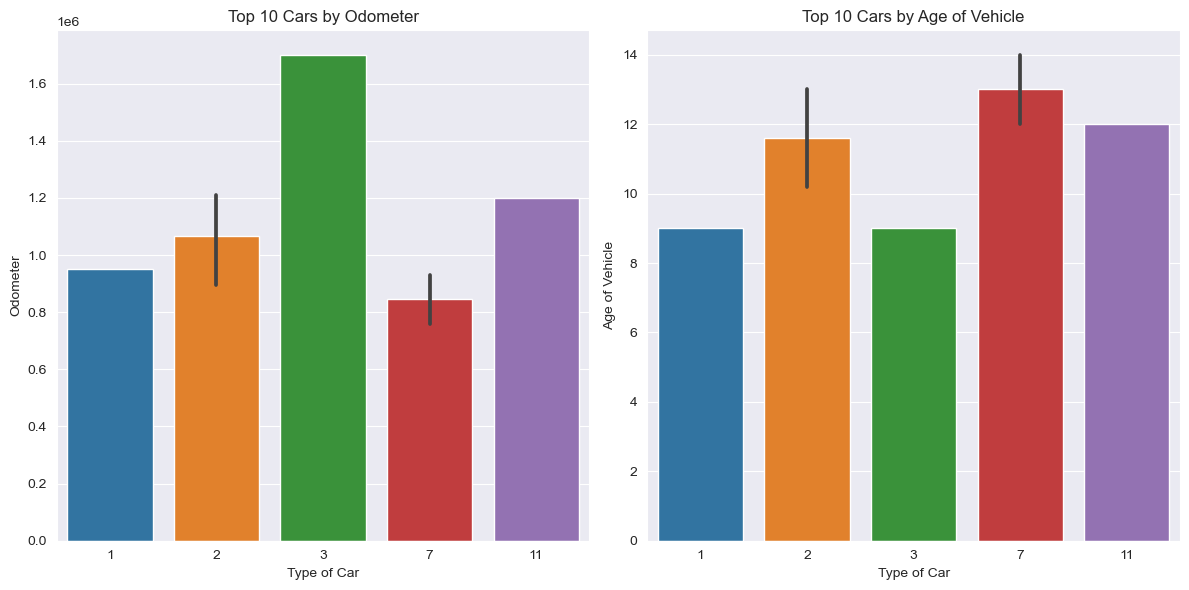

In [79]:
plt.figure(figsize=(12, 6))

# Plot the odometer values
plt.subplot(1, 2, 1)
sns.barplot(x='type', y='odometer', data=top_10_cars)
plt.title('Top 10 Cars by Odometer')
plt.xlabel('Type of Car')
plt.ylabel('Odometer')

# Plot the price values
plt.subplot(1, 2, 2)
sns.barplot(x='type', y='Age of Vehicle', data=top_10_cars)
plt.title('Top 10 Cars by Age of Vehicle')
plt.xlabel('Type of Car')
plt.ylabel('Age of Vehicle')

plt.tight_layout()
plt.show()


In [81]:
fuel_mapping = {1: 'gas', 2: 'diesel', 3: 'other', 4: 'hybrid', 5: 'electric'}

# Print the fuel type descriptions
for value in fuel_counts.index:
    print(f"{value}: {fuel_mapping[value]}")


1: gas
2: diesel
4: hybrid
5: electric
3: other


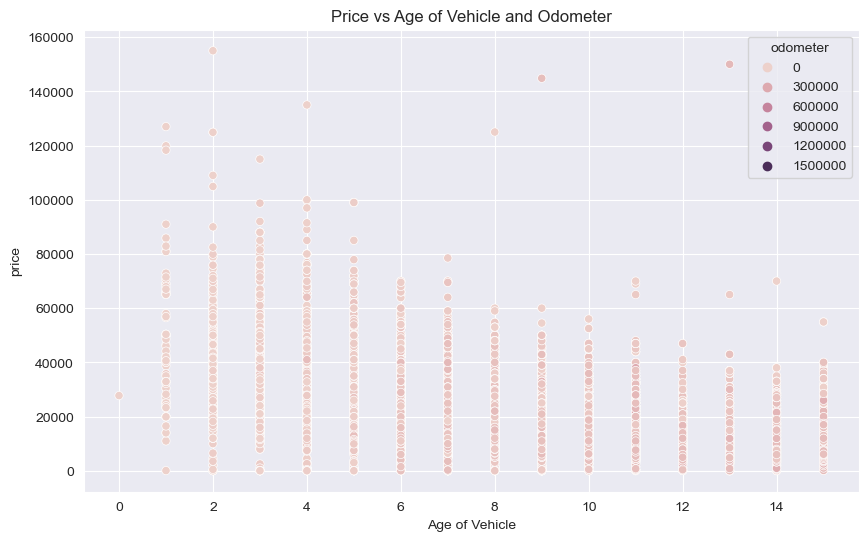

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age of Vehicle', y='price', hue='odometer', data=vh_final)
plt.title('Price vs Age of Vehicle and Odometer')
plt.show()


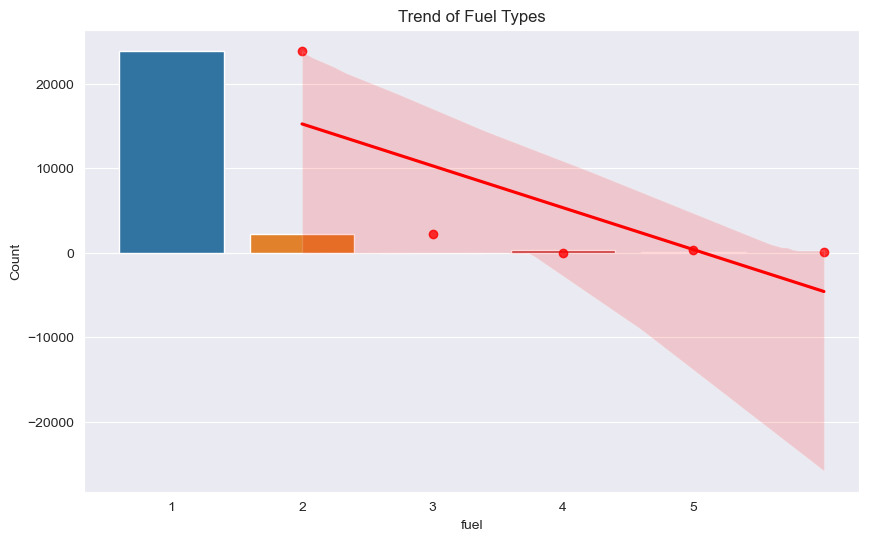

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each fuel type
fuel_counts = vh_final['fuel'].value_counts()

# Create a bar plot of the fuel types
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.title('Trend of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Add a trend line
sns.regplot(x=fuel_counts.index, y=fuel_counts.values, color='red')

plt.show()


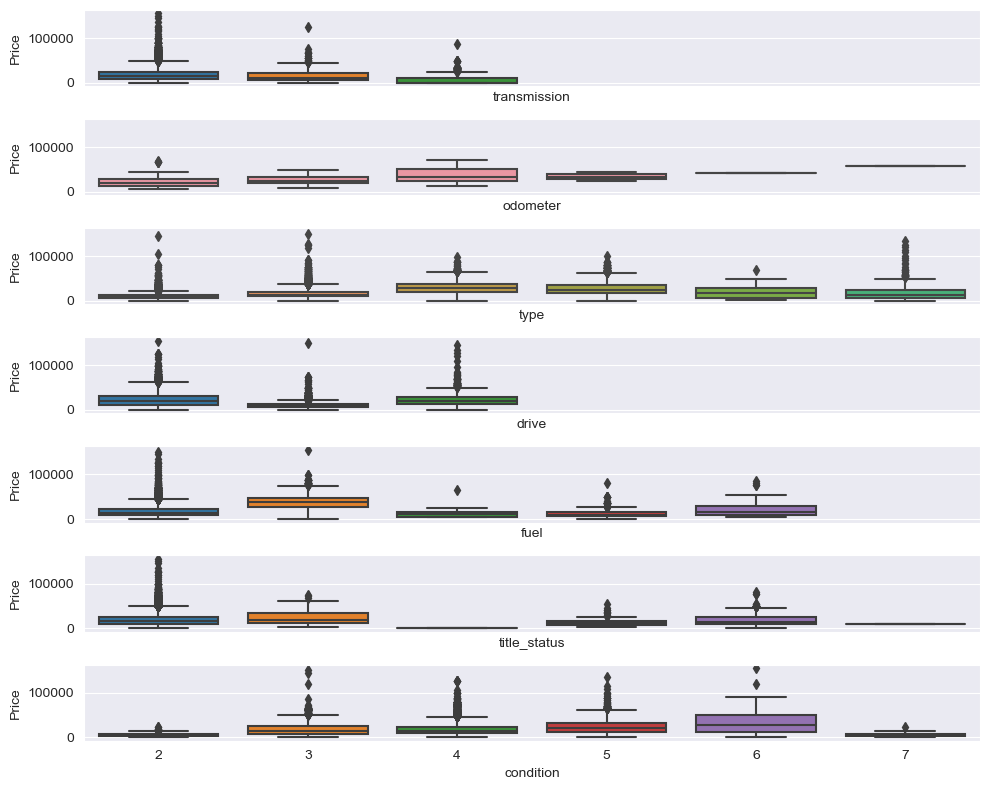

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables of interest
variables = ['transmission', 'odometer', 'type', 'drive', 'fuel', 'title_status', 'condition']

# Create subplots for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 8), sharex=True)

# Iterate over each variable and create a box plot
for i, var in enumerate(variables):
    sns.boxplot(x=var, y='price', data=vh_final, ax=axes[i])
    axes[i].set_ylabel('Price')
    axes[i].set_xlabel(var)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

    

Perform Seasonal Decomposition

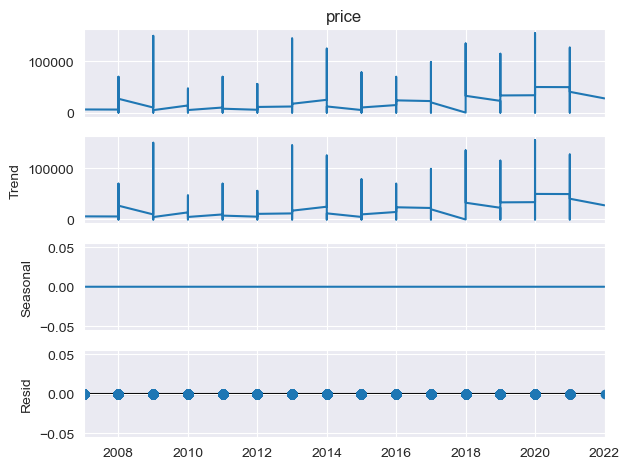

In [62]:
seasonal_decompose(vh_final['price'], model='additive', period=1).plot()
plt.show()

Perform Adfuller Test

In [63]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on Group 7
result = adfuller(vh_final['price'])

# Extract the p-value from the test result
p_value = result[1]

# Check if the time series is stationary based on the p-value
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

print("p-value:", p_value)


The time series is stationary.
p-value: 1.7794939783448567e-05


Perform Autocorrelation

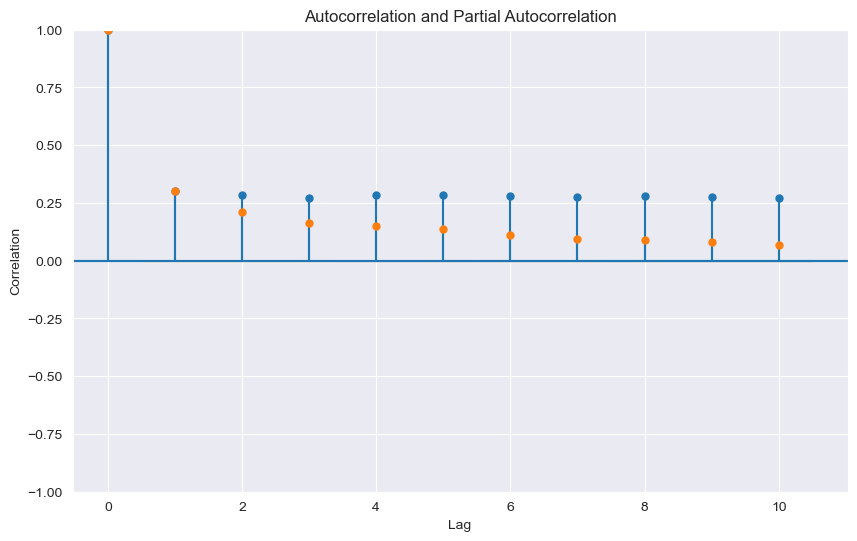

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform autocorrelation and partial autocorrelation on the time series data
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(vh_final['price'], lags=10, ax=ax, alpha=0.5)
plot_pacf(vh_final['price'], lags=10, ax=ax, alpha=0.5)

# Set the plot title and labels
ax.set_title('Autocorrelation and Partial Autocorrelation')
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')

# Show the plot
plt.show()


In [85]:
print("Year Range:", vh_final.index.min().year, "to", vh_final.index.max().year)


Year Range: 2007 to 2022


Train/Test Split

In [86]:
from sklearn.model_selection import train_test_split

# Perform train/test split on the vh_final
X_train, X_test, y_train, y_test = train_test_split(vh_final.iloc[:, 1:], vh_final.iloc[:, 0], test_size=0.3, shuffle=False)

# Print the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (18657, 9)
Testing data shape: (7997, 9)


Select Model and Conduct Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the description of the cross-validation results
print("Cross-Validation Results:")
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())



Cross-Validation Results:
Mean Score: 0.15069886430324092
Standard Deviation: 0.1496113699432247


Apply Permutation Importance for Important Feature Ranking 

In [93]:
from sklearn.inspection import permutation_importance

# Perform permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Get the feature importances
importances = result.importances_mean

# Get the feature names
feature_names = X_test.columns

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature importances
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


size: 0.17626271847820008
fuel: 0.08103817314387483
Age of Vehicle: 0.03966170066316569
odometer: 0.03869876209425881
drive: 0.03281888050896945
transmission: 0.022325542187595894
title_status: 0.008470036700523076
type: 0.007868332074648621
condition: -0.000501158627987952


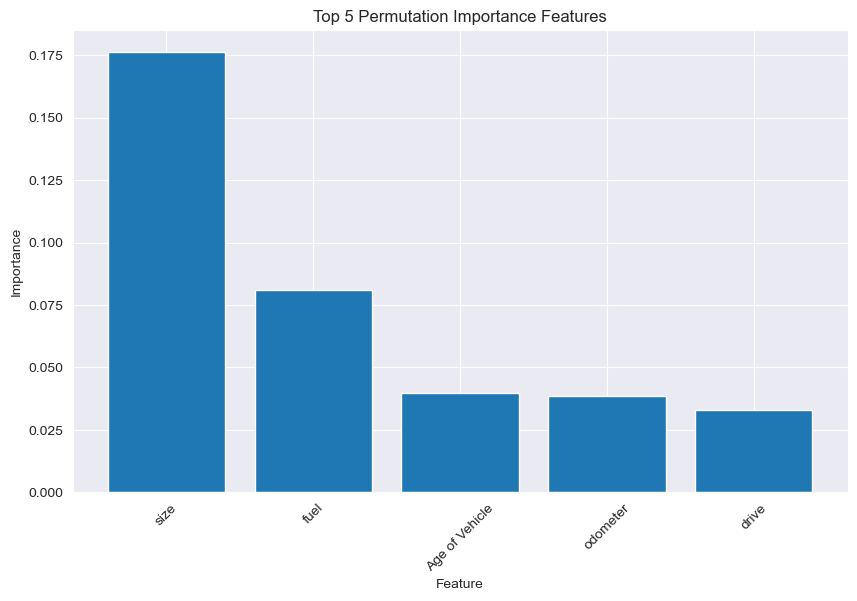

In [97]:
import matplotlib.pyplot as plt

# Get the top 5 feature indices
top_indices = sorted_indices[:5]

# Get the top 5 feature names and importances
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# Plot the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances)
plt.title('Top 5 Permutation Importance Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [98]:
# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 188934206.0526105
R-squared (R2) Score: 0.235032351937706


In [99]:
# Define your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive values
cv_scores = -cv_scores

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)


Mean CV Score: 34764343.063283555
Standard Deviation of CV Scores: 14228399.890110102


In [100]:
# Create the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Perform permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Get the feature importances
importances = result.importances_mean

# Get the feature names
feature_names = X_test.columns

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature importances
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


drive: 0.20566876041791637
type: 0.19310758775903233
fuel: 0.17330849999549847
odometer: 0.15912153182099228
size: 0.07312845326242473
transmission: 0.024898000570124867
condition: 0.020475793843928936
title_status: 0.002846503091310182
Age of Vehicle: 0.0


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 132944702.09707333
R-squared (R2) Score: 0.46172586631971957


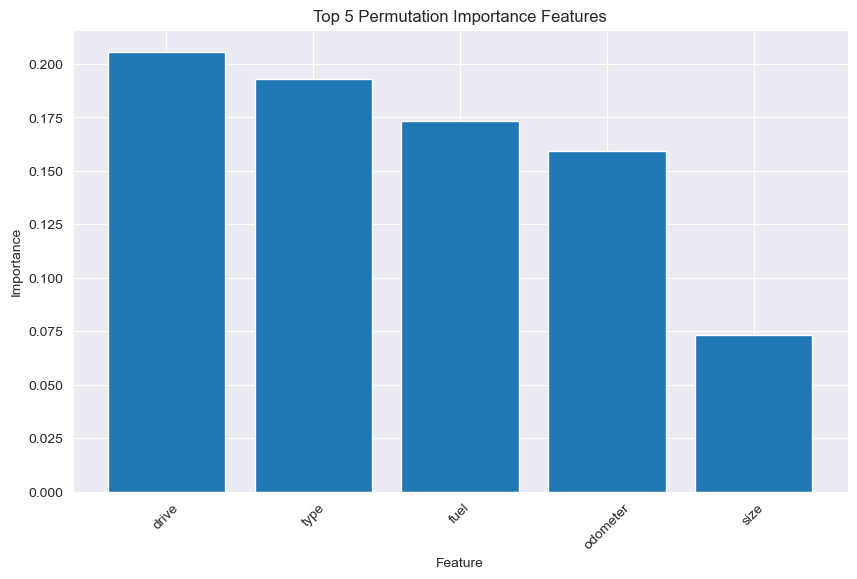

In [101]:
# Get the top 5 feature indices
top_indices = sorted_indices[:5]

# Get the top 5 feature names and importances
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# Plot the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances)
plt.title('Top 5 Permutation Importance Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


Compare Performance of your Models

In [103]:
# Create the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Compare the performance of the two models
if linear_mse < rf_mse:
    print("Linear Regression model has a lower MSE.")
else:
    print("Random Forest Regressor model has a lower MSE.")

if linear_r2 > rf_r2:
    print("Linear Regression model has a higher R2 score.")
else:
    print("Random Forest Regressor model has a higher R2 score.")


Random Forest Regressor model has a lower MSE.
Random Forest Regressor model has a higher R2 score.


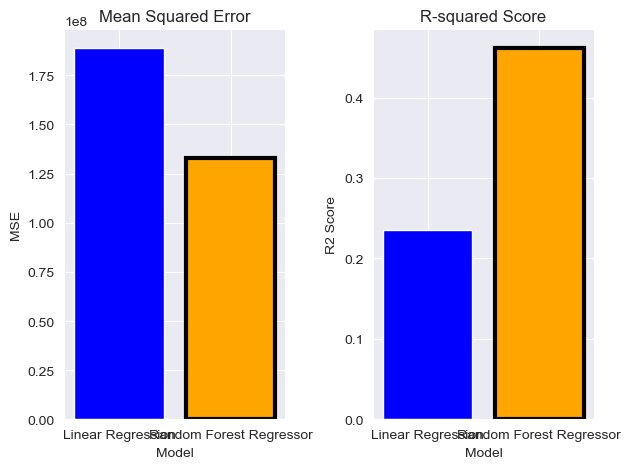

In [106]:
# Create a list of model names
model_names = ['Linear Regression', 'Random Forest Regressor']

# Create a list of mean squared errors
mse_values = [linear_mse, rf_mse]

# Create a list of R-squared scores
r2_values = [linear_r2, rf_r2]

# Create a list of colors for the bars
colors = ['blue', 'orange']

# Create a bar plot for mean squared errors
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color=colors)
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('MSE')

# Create a bar plot for R-squared scores
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=colors)
plt.title('R-squared Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# Find the index of the best model based on MSE
best_model_index = mse_values.index(min(mse_values))

# Bold the best model in the bar plots
plt.subplot(1, 2, 1)
plt.bar(model_names[best_model_index], mse_values[best_model_index], color=colors[best_model_index], linewidth=3, edgecolor='black')
plt.subplot(1, 2, 2)
plt.bar(model_names[best_model_index], r2_values[best_model_index], color=colors[best_model_index], linewidth=3, edgecolor='black')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [109]:
# Get the top feature indices
top_indices = sorted_indices[:5]

# Get the top feature names
top_features = feature_names[top_indices]

# Create a new DataFrame with only the top features
top_features_df = vh_final[top_features]

# Split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_features_df, vh_final['price'], test_size=0.3, random_state=42)

# Train a regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Create a scatter plot using Plotly
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'})
fig.update_layout(title='Actual vs Predicted Prices', xaxis_range=[0, 50000], yaxis_range=[0, 50000])
fig.show()


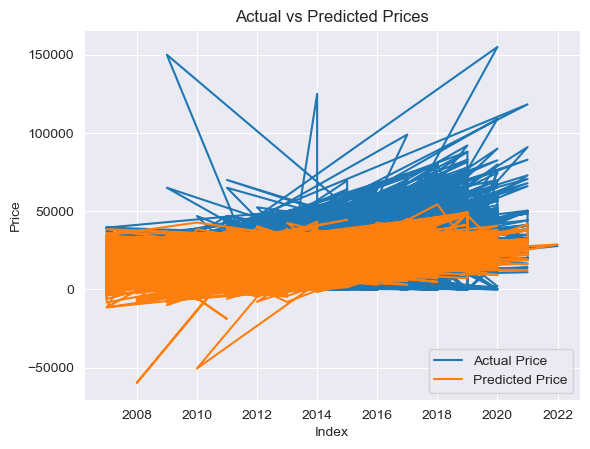

In [113]:
# Get the top feature indices
top_indices = sorted_indices[:5]

# Get the top feature names
top_features = feature_names[top_indices]

# Create a new DataFrame with only the top features
top_features_df = vh_final[top_features]

# Split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_features_df, vh_final['price'], test_size=0.3, random_state=42)

# Train a regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Create a line graph using matplotlib
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


Prediction Accuracy Check

In [120]:
from sklearn.metrics import mean_absolute_error
### MAE tells you the average absolute difference between the predicted values and the actual values, while RMSE tells you the average squared difference between the predicted values and the actual values. RMSE is more sensitive to outliers than MAE, so it penalizes large errors more
# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Determine if the prediction was accurate
if mae < 1000:
    print("The prediction was accurate.")
else:
    print("The prediction was not accurate.")

print("MAE:", mae)


The prediction was not accurate.
MAE: 7897.154845547206
